In [50]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


train=pd.read_csv("train.csv")
print(train.shape)
train.head()

test=pd.read_csv("test.csv")
print(test.shape)
test.head()



(20800, 5)
(5200, 4)


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [51]:

test=pd.read_csv("test.csv")
print(test.shape)
test.head()



(5200, 4)


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [52]:
print(test.isnull().sum())
for col in test.columns:
    pct_missing = np.mean(test[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id          0
title     122
author    503
text        7
dtype: int64
id - 0%
title - 2%
author - 10%
text - 0%


In [53]:
test.author = test.author.fillna("not provided")
test.title = test.title.fillna("missing")
test.text = test.text.fillna("missing")

In [54]:
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [55]:
print(train.isnull().sum())
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id           0
title      558
author    1957
text        39
label        0
dtype: int64
id - 0%
title - 3%
author - 9%
text - 0%
label - 0%


In [56]:
train.author = train.author.fillna("not provided")
train.title = train.title.fillna("missing")
train.text = train.text.fillna("missing")

In [57]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [58]:
labels=train.label
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [59]:
print(test.shape)

print(train.shape)

(5200, 4)
(20800, 5)


In [60]:
new_train= train['text'].copy()
new_train.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    Ever get the feeling your life circles the rou...
2    Why the Truth Might Get You Fired October 29, ...
3    Videos 15 Civilians Killed In Single US Airstr...
4    Print \nAn Iranian woman has been sentenced to...
Name: text, dtype: object

In [61]:
new_test= test['text'].copy()
new_test.head()

0    PALO ALTO, Calif.  —   After years of scorning...
1    Russian warships ready to strike terrorists ne...
2    Videos #NoDAPL: Native American Leaders Vow to...
3    If at first you don’t succeed, try a different...
4    42 mins ago 1 Views 0 Comments 0 Likes 'For th...
Name: text, dtype: object

In [62]:
x_train, x_val, y_train, y_val = train_test_split(new_train, labels, test_size=0.2, random_state=10)

In [63]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(new_test)
tfidf_val=tfidf_vectorizer.transform(x_val) 

In [65]:
pac=PassiveAggressiveClassifier(max_iter=80)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_val)
score=accuracy_score(y_val,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.84%


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[1990  100]
 [  73 1997]]


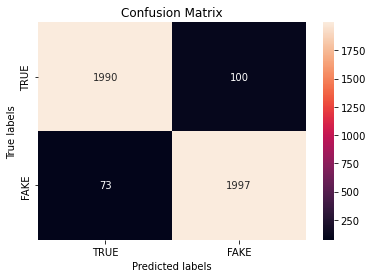

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.yaxis.set_ticklabels(['TRUE', 'FAKE']);
ax.xaxis.set_ticklabels(['TRUE', 'FAKE']); 